### Task 1: Import usual libraries that will need

In [13]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

### Task 2: Read car_plate.jpg from image folder

In [2]:
car = cv2.imread('../image/car2.jpg')
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

### Task 3: Create image display function

In [22]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

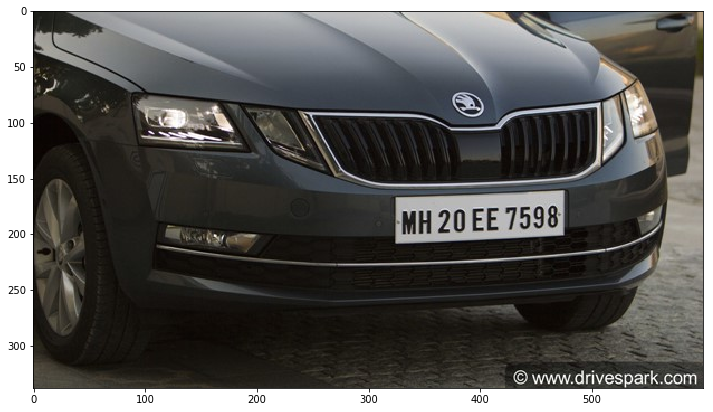

In [4]:
display(car)

### Task 4: Load haarcascade_russian_plate_number.xml  file

In [5]:
cascading_plate = cv2.CascadeClassifier('../image/data/haarcascade_russian_plate_number.xml')

### Task 5: Create a function that detects a number plate and draw a rectangle around number plate and later on we will blur number plate

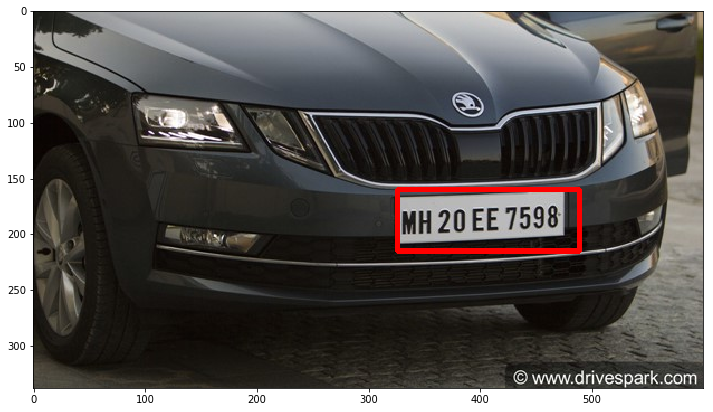

In [6]:
def detect_plate(img_car):
    
    img = img_car.copy()
    
    plate = cascading_plate.detectMultiScale(img, 1.2, 5)
    
    for x,y,w,h in plate:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)

    
    return img
    
img = detect_plate(car)
display(img)

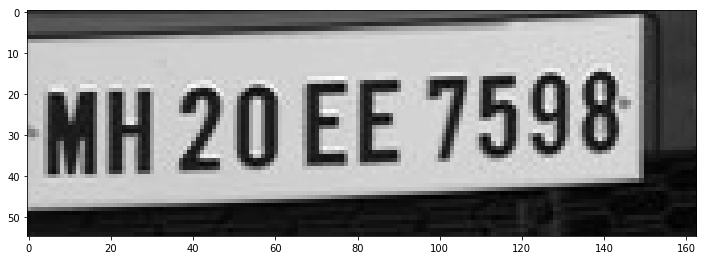

In [23]:
def detect_plate(img_car):
    
    img = img_car.copy()
    blur_area = img_car.copy()
    
    plate = cascading_plate.detectMultiScale(img, 1.2, 5)
    
    for x,y,w,h in plate:
#         cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 10)
        blur_area = blur_area[y:y+h, x:x+w]
        blur_area = cv2.cvtColor(blur_area, cv2.COLOR_RGB2GRAY)
        #blur_area = cv2.medianBlur(blur_area, 15)
        #img[y:y+h, x:x+w] = blur_area
    
    return blur_area
    
img = detect_plate(car)
display(img, cmap='gray')

In [14]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [24]:
text = pytesseract.image_to_string(img, lang='eng', config='--psm 6')
print("Number is:" ,text)

Number is: MH 20EE 75985
